In [1]:
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline
import os
import numpy as np
from astropy.io.ascii import masked
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
%env HOME=C:/Users/USER/Documents/GitHub
homedir = os.getenv("HOME")
tabledir = homedir+'/Virgo/tables/'
plotdir = homedir+'/Virgo/plots/'

env: HOME=C:/Users/USER/Documents/GitHub


In [3]:
os.listdir(tabledir)

['FeedingintoHerschel.dat',
 'Herschelcondensed.csv',
 'Herschelcondensed.fits',
 'vf_v2_a100.fits',
 'vf_v2_agc.fits',
 'vf_v2_arcsecH.csv',
 'vf_v2_co.fits',
 'vf_v2_CO_HI.fits',
 'vf_v2_environment.fits',
 'vf_v2_extinction.fits',
 'vf_v2_filament_distances.fits',
 'vf_v2_galfit_g.fits',
 'vf_v2_galfit_r.fits',
 'vf_v2_galfit_W1.fits',
 'vf_v2_galfit_W2.fits',
 'vf_v2_galfit_W3.fits',
 'vf_v2_galfit_W4.fits',
 'vf_v2_galfit_z.fits',
 'vf_v2_halpha.fits',
 'vf_v2_halpha_obs.fits',
 'vf_v2_hyperleda.fits',
 'vf_v2_kourkchi_galaxies.fits',
 'vf_v2_legacy_dr9.fits',
 'vf_v2_legacy_ephot.fits',
 'vf_v2_legacy_viewer.fits',
 'vf_v2_magphys_10-Jul-2023.fits',
 'vf_v2_magphys_legacyExt_11-Jul-2023.fits',
 'vf_v2_magphys_salimExt_11-Jul-2023.fits',
 'vf_v2_main.csv',
 'vf_v2_main.fits',
 'vf_v2_matchTempel_groupinfo.fits',
 'vf_v2_nedquery.fits',
 'vf_v2_nsa_v0.fits',
 'vf_v2_nsa_v1.fits',
 'vf_v2_paper1.fits',
 'vf_v2_r_photometry.fits',
 'vf_v2_steer17.fits',
 'vf_v2_Tempelgroups_infos.fit

In [24]:
%run C:/Users/USER/Documents/GitHub/Virgo/programs/readtablesv2.py --help

usage: readtablesv2.py [-h] [--tabledir TABLEDIR] [--tableprefix TABLEPREFIX]

Read in all virgo filament tables

options:
  -h, --help            show this help message and exit
  --tabledir TABLEDIR   directory where tables are stored
  --tableprefix TABLEPREFIX
                        prefix for tables; default is vf_v2


In [25]:
%run C:/Users/USER/Documents/GitHub/Virgo/programs/readtablesv2.py --tabledir $tabledir

In [16]:
# make a subset of the main table
test = v.main['HAobsflag']
newtab = v.main[test]
fill = []
# add column for filament

#newtab.write(plotdir+"test.fits",format='fits',overwrite=True)
#newtab.write(plotdir+"test.csv",format='csv',overwrite=True)
newtab.write(plotdir+"Sourcelist.dat",format='ipac', overwrite=True)

In [17]:
# check that the table contains what we think it should
newtab

VFID,RA,DEC,vr,radius,radius_flag,objname,PGC,NSAIDV1,NSAIDV0,AGC,NEDname,HLflag,NSAV1flag,NSAV0flag,A100flag,VFID_V1,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,Herschelflag,HerschelFlag
,,,,arcsec,,,,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes8,bool,bool,bool,bool,bool,bool,bytes36,bool,bool
VFID0377,243.62550000000002,62.5366944,2876.1,41.506992,True,IC1210,57589,633255,146842,0,IC 1210,True,True,True,False,VFID0377,True,True,True,True,True,True,VFID0377-IC1210,False,False
VFID0385,245.21731112326881,62.433934050249185,3015.6396484375,0.290445,True,--,-1000,530252,0,0,MCG +10-23-067,False,True,False,False,VFID0385,False,False,True,False,True,True,VFID0385-MCG+10-23-067,False,False
VFID0422,243.761709,61.7819444,2942.0,9.911086,True,PGC057611,57611,633260,146848,0,ARK 499,True,True,True,False,VFID0422,True,True,True,True,True,True,VFID0422-ARK499,False,False
VFID0448,257.543478,61.3504145,3086.9,24.78114,True,UGC10745,59725,24379,4179,0,UGC 10745,True,True,True,False,VFID0448,False,True,True,False,True,True,VFID0448-UGC10745,False,False
VFID0469,175.4438415,60.9945906,3288.5,7.032686,True,SDSSJ114146.27+605938.2,4291418,0,0,0,SDSS J114145.90+605931.9,True,False,False,False,VFID0469,False,True,True,False,True,True,VFID0469-SDSSJ114145.90+605931.9,False,False
VFID0473,256.8030195,60.9206687,3097.2,15.17474,True,PGC2609009,2609009,25174,4286,0,WISEA J170712.75+605514.5,True,True,True,False,VFID0473,False,True,True,False,True,True,VFID0473-WISEAJ170712.75+605514.5,False,False
VFID0474,176.102055,60.8840823,1497.1,14.558655,True,PGC2608407,2608407,573091,124560,0,WISEA J114424.53+605302.6,True,True,True,False,VFID0474,False,True,True,False,True,True,VFID0474-WISEAJ114424.53+605302.6,False,False
VFID0481,256.9186545,60.7508328,3056.0,40.749405,True,NGC6307,59655,634065,147732,0,NGC 6307,True,True,True,False,VFID0481,False,True,True,True,True,True,VFID0481-NGC6307,False,False


In [30]:
# make a subset of the main table
test = v.main['Herschelflag']
newtab = v.main[test]
fill = []
# add column for filament

#newtab.write(plotdir+"test.fits",format='fits',overwrite=True)
#newtab.write(plotdir+"test.csv",format='csv',overwrite=True)
newtab.write(tabledir+"Herschelcondensed.csv",format='csv', overwrite=True)

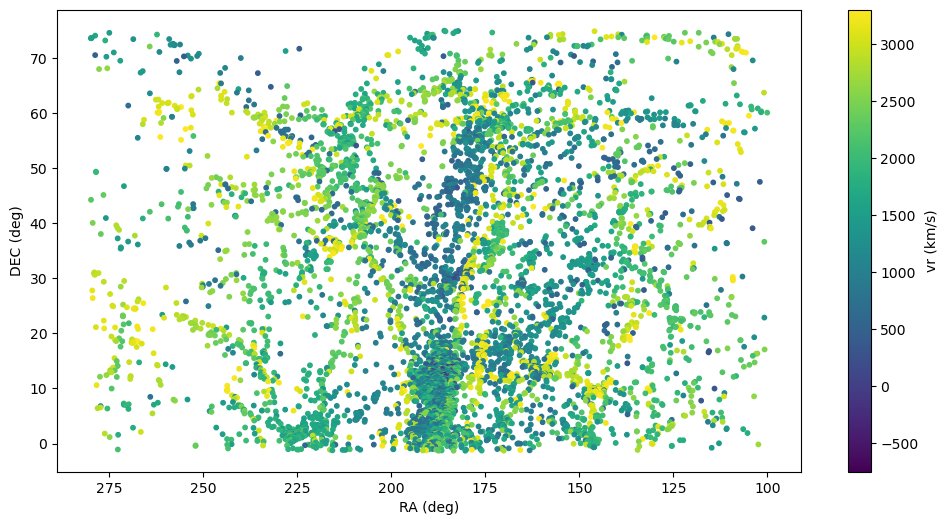

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(v.main['RA'],v.main['DEC'],c=v.main['vr'],s=10)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
cb = plt.colorbar()
cb.set_label('vr (km/s)')
ax = plt.gca()
ax.invert_xaxis()

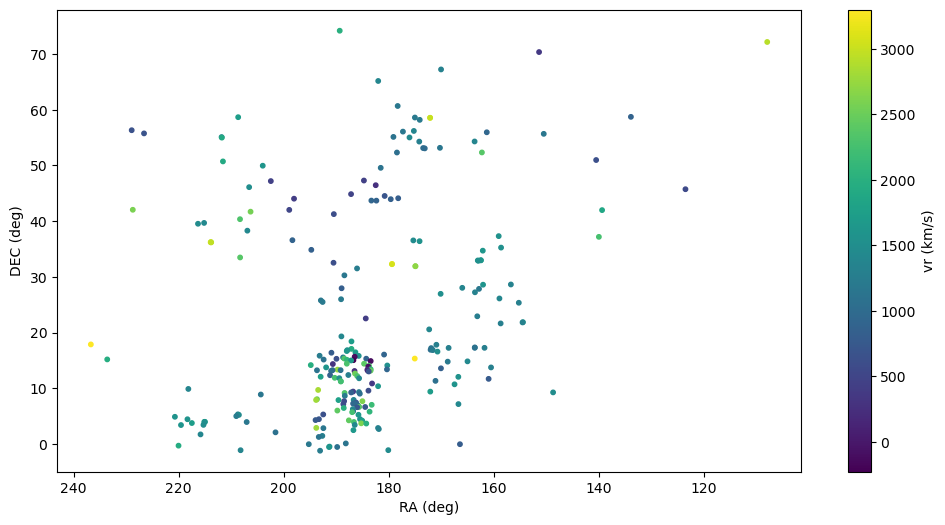

In [34]:
plt.figure(figsize=(12,6))
plt.scatter(v.arcsecH['ra_01'],v.arcsecH['dec_01'],c=v.arcsecH['vr'],s=10)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
cb = plt.colorbar()
cb.set_label('vr (km/s)')
ax = plt.gca()
ax.invert_xaxis()

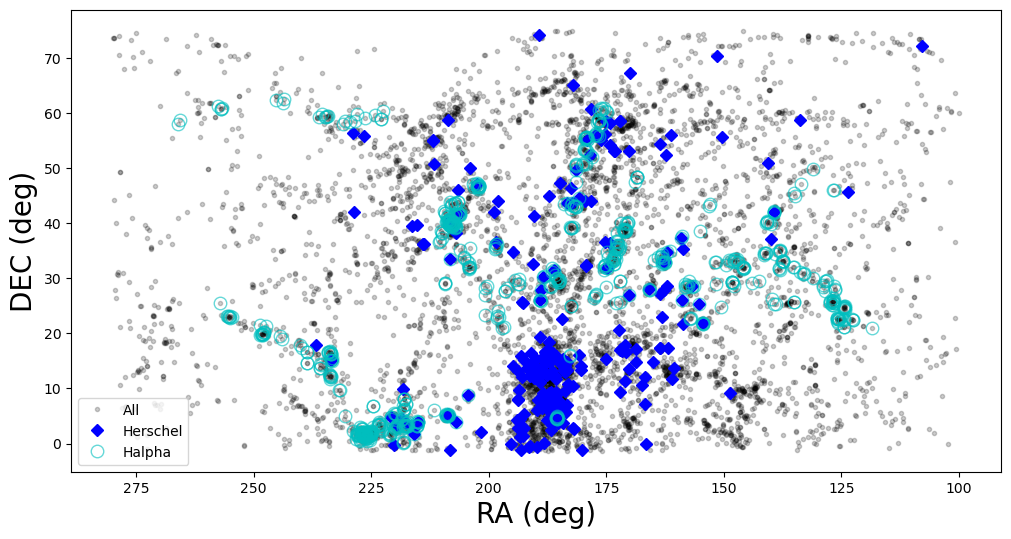

In [10]:
plt.figure(figsize=(12,6))
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.2,label='All')
# plot CO sources
plt.plot(v.arcsecH['ra_01'],v.arcsecH['dec_01'],'bD',markersize=6,alpha=1,label='Herschel')
# Galaxies observed with Halpha
flag =  v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=9,mfc='None',alpha=.6,label='Halpha')
plt.legend()#label='vr (km/s)')
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.savefig(plotdir+'Herschel-data.png', dpi=150)

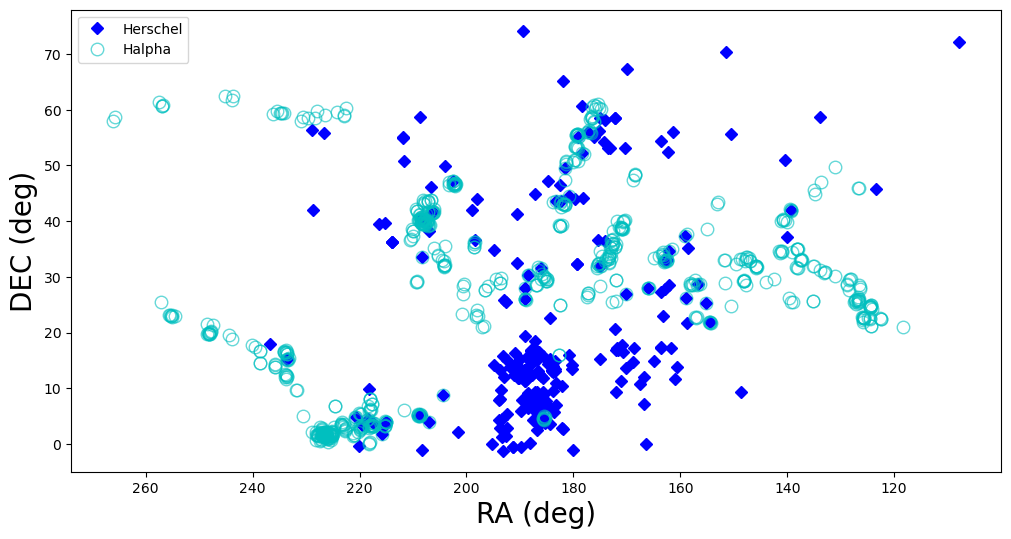

In [11]:
plt.figure(figsize=(12,6))
# plot Herschel matches
plt.plot(v.arcsecH['ra_01'],v.arcsecH['dec_01'],'bD',markersize=6,alpha=1,label='Herschel')
# Galaxies observed with Halpha
flag =  v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=9,mfc='None',alpha=.6,label='Halpha')
plt.legend()#label='vr (km/s)')
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.savefig(plotdir+'Herschel-data-wr-HA.png', dpi=150)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

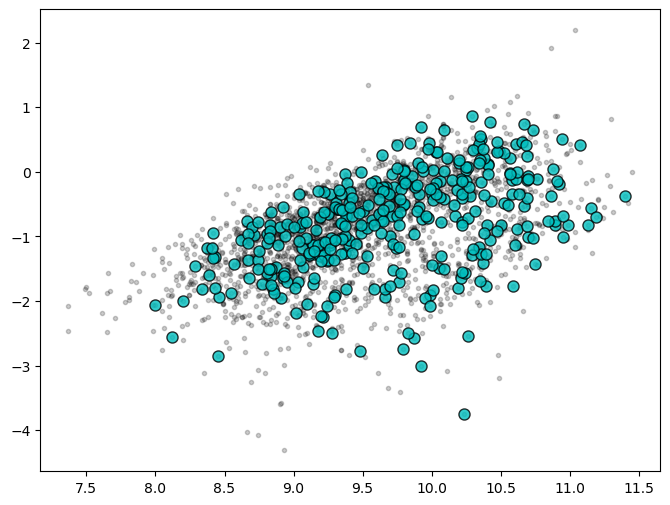

In [12]:
plt.figure(figsize=(8,6))
# make a flag for those with an available stellar mass
flag = v.main['Z0MGSflag']

# plot SFR vs stellar mass
plt.plot(v.z0mgs['logmass'][flag],v.z0mgs['logsfr'][flag],'k.',alpha=.2,label='All')

# now let's plot the CO sources as well
flagHA = (v.z0mgs['logmass'] > 0) & v.main['HAobsflag']
plt.plot(v.z0mgs['logmass'][flagHA],v.z0mgs['logsfr'][flagHA],'co',markersize=8,mec='k',alpha=.8,label='HA')
flagHS = (v.z0mgs['logmass'] > 0) & v.arcsecH
plt.plot(v.z0mgs['logmass'][flagHS],v.z0mgs['logsfr'][flagHS],'bD',markersize=8,mec='k',alpha=.8,label='HS')
plt.legend()

plt.xlabel(r'$\rm \log_{10}(M_\star/M_\odot)$',fontsize=20)
plt.ylabel(r'$\rm \log_{10}(SFR/M_\odot~yr^{-1})$',fontsize=20)
plt.title('Comparison of CO Sample to All Galaxies',fontsize=22)

In [6]:
v.arcsecH.colnames

['cntr_01',
 'dist_x',
 'pang_x',
 'ra_01',
 'dec_01',
 'vfid_01',
 'name',
 'nameH',
 'band',
 'ra',
 'dec',
 'raerr',
 'decerr',
 'flux',
 'snr',
 'stn',
 'strn',
 'fwhmxfit',
 'fwhmyfit',
 'flag_elong',
 'edgeflag',
 'obsid',
 'vr',
 '70micronsflag',
 '100micronsflag']

In [8]:
galaxy = Table.read(tabledir+'Herschelstuff.csv')

In [22]:
#Code to match the VFID to the main fits file

test = v.main
# Read tables from FITS and CSV files
table1 = Table.read(tabledir+'vf_v2_main.fits')  # Update with the actual path to your FITS file
df2 = pd.read_csv(tabledir+'Herschelstuff.csv')  # Update with the actual path to your CSV file

# Convert VFID in table1 to str8 for comparison
table1['VFID'] = table1['VFID'].astype(str)
table1['Herschelflag'] = False
# Iterate through rows in df2 and update table1
for index, row in df2.iterrows():
    vfid_01_value = str(row['vfid_01'])  # Ensure vfid_01 is in str format for comparison
    
    # Find rows in table1 where VFID matches vfid_01
    matching_rows = table1['VFID'] == vfid_01_value
    
    # Update 'HerschelFlag' to True for matching rows
    table1['Herschelflag'][matching_rows] = True

# Convert VFID in table1 back to bytes8 format
table1['VFID'] = table1['VFID'].astype(bytes)

# Save the updated table1 to a new FITS file
table1.write(tabledir+'vf_v2_main.fits', overwrite=True) 

In [10]:
update = Table([v.main['VFID'],v.main['RA'],v.main['DEC'],v.main['vr'],v.main['radius'],v.main['radius_flag'],v.main['objname'],v.main['PGC'],v.main['NSAIDV1'],v.main['NSAIDV0'],v.main['AGC'],v.main['NEDname'],v.main['HLflag'],v.main['NSAV1flag'],v.main['NSAV0flag'],v.main['A100flag'],v.main['VFID_V1'],v.main['COflag'],v.main['HAflag'],v.main['HAobsflag'],v.main['Z0MGSflag'],v.main['Steerflag'],v.main['unwiseflag'],v.main['Herschelflag'],v.main['prefix']])
update.write(plotdir+"vf_v2_main.fits",format='fits', overwrite=True)

In [26]:
ahaha = v.main
ahaha.write(tabledir+'vf_v2_main.csv',format='csv', overwrite=True) 